## Setup Environment

In [54]:
%pip install pydicom pandas numpy matplotlib scikit-image pylibjpeg pylibjpeg-openjpeg

Note: you may need to restart the kernel to use updated packages.


In [7]:
import os
import sys
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

from src.dcm_reader import view_image

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

In [55]:
set_type = 'train'
labels_file_path = f"../tmp/{set_type}/BCS-DBT-labels-{set_type}-v2.csv"
data_set_file_path = f"../tmp/{set_type}/BCS-DBT-file-paths-{set_type}-v2.csv"

df = pd.read_csv(data_set_file_path)

Loading file: /Users/future/Documents/Work/_Main/.Projects/ML_DBT_Classifier/src/../tmp/train/manifest-1617905855234/Breast-Cancer-Screening-DBT/DBT-P00003/01-01-2000-DBT-S01306-MAMMO screening digital bilateral-33603/18384.000000-NA-64500/1-1.dcm


/opt/anaconda3/lib/python3.11/site-packages/openjpeg/utils.py:314: UserWarning: The (0028,0101) Bits Stored value '10' in the dataset does not match the component precision value '16' found in the JPEG 2000 data. It's recommended that you change the Bits Stored value to produce the correct output
  warnings.warn(


PatientId: DBT-P00003
View: lmlo


array([[[57087, 58495, 58495, ...,     0,     0,     0],
        [57215, 55551, 51199, ...,     0,     0,     0],
        [54911, 55295, 52735, ...,     0,     0,     0],
        ...,
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0]],

       [[61439, 58879, 53631, ...,     0,     0,     0],
        [55167, 55167, 54271, ...,     0,     0,     0],
        [56703, 57215, 58111, ...,     0,     0,     0],
        ...,
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0]],

       [[55807, 54655, 52735, ...,     0,     0,     0],
        [56703, 56703, 57855, ...,     0,     0,     0],
        [56063, 56319, 58111, ...,     0,     0,     0],
        ...,
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,    

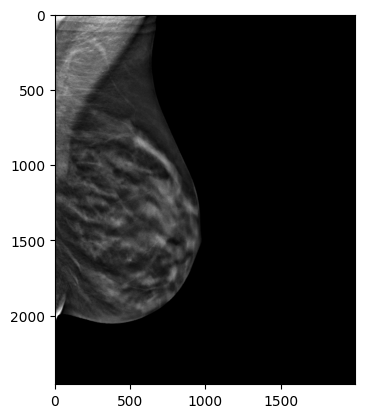

In [6]:
view_image(set_type, df, plt, 0)

Loading file: /Users/future/Documents/Work/_Main/.Projects/ML_DBT_Classifier/src/../tmp/train/manifest-1617905855234/Breast-Cancer-Screening-DBT/DBT-P00003/01-01-2000-DBT-S01306-MAMMO screening digital bilateral-33603/18384.000000-NA-64500/1-1.dcm
PatientId: DBT-P00003
View: lmlo


array([[[57087, 58495, 58495, ...,     0,     0,     0],
        [57215, 55551, 51199, ...,     0,     0,     0],
        [54911, 55295, 52735, ...,     0,     0,     0],
        ...,
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0]],

       [[61439, 58879, 53631, ...,     0,     0,     0],
        [55167, 55167, 54271, ...,     0,     0,     0],
        [56703, 57215, 58111, ...,     0,     0,     0],
        ...,
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0]],

       [[55807, 54655, 52735, ...,     0,     0,     0],
        [56703, 56703, 57855, ...,     0,     0,     0],
        [56063, 56319, 58111, ...,     0,     0,     0],
        ...,
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,    

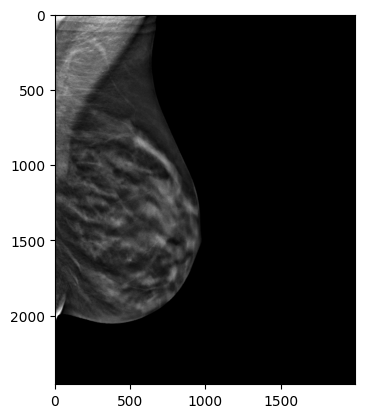

In [13]:
view_image(set_type, df, plt, 1)

In [ ]:
view_image(set_type, df, plt, 2)

In [ ]:
view_image(set_type, df, plt, 3)

In [56]:
def view_img_count_distribution(set_type):
    data_set_file_path = f"../tmp/{set_type}/BCS-DBT-file-paths-{set_type}-v2.csv"
    df = pd.read_csv(data_set_file_path)
    patient_counts = df['PatientID'].value_counts()
    occurrence_counts = patient_counts.value_counts().sort_index()
    total_images = patient_counts.sum()
    summary_df = pd.DataFrame({
        '# Images': occurrence_counts.index,
        '# Patients': occurrence_counts.values,
        '% Percent of total': (occurrence_counts.values * occurrence_counts.index / total_images) * 100
    })
    summary_df['% Percent of total'] = summary_df['% Percent of total'].round(2)

    print(f'{set_type.capitalize()} Dataset')
    print(summary_df.to_string(index=False))

view_img_count_distribution('train')
view_img_count_distribution('test')


Train Dataset
 # Images  # Patients  % Percent of total
        1          11                0.06
        2          84                0.88
        3           3                0.05
        4        3792               79.21
        8         468               19.55
       12           4                0.25
Test Dataset
 # Images  # Patients  % Percent of total
        1           3                0.17
        2          53                6.16
        3           4                0.70
        4         316               73.45
        8          42               19.52


In [57]:
def view_distribution(set_type):
    file_path = f"../tmp/{set_type}/BCS-DBT-labels-{set_type}-v2.csv"
    df_labels = pd.read_csv(file_path)
    grouped = df_labels.groupby('PatientID').agg({
        'Normal': 'sum',
        'Actionable': 'max',
        'Benign': 'max',
        'Cancer': 'max'
    }).reset_index()

    normal_count = grouped[(grouped['Actionable'] == 0) & (grouped['Benign'] == 0) & (grouped['Cancer'] == 0)]['PatientID'].count()
    actionable_count = grouped[grouped['Actionable'] == 1]['PatientID'].count()
    benign_count = grouped[grouped['Benign'] == 1]['PatientID'].count()
    cancer_count = grouped[grouped['Cancer'] == 1]['PatientID'].count()

    total_patients = len(grouped)
    normal_percentage = round((normal_count / total_patients) * 100,2)
    benign_percentage = round((benign_count / total_patients) * 100,2)
    cancer_percentage = round((cancer_count / total_patients) * 100,2)
    actionable_percentage = round((actionable_count / total_patients) * 100,2)

    summary_df = pd.DataFrame({
        'Category': ['Normal', 'Actionable', 'Benign', 'Cancer'],
        '# Patients': [normal_count, actionable_count, benign_count, cancer_count],
        'Percentage': [normal_percentage, actionable_percentage, benign_percentage, cancer_percentage]
    })

    print(f'{set_type.capitalize()} Dataset')
    print(summary_df)
    print('\n')

view_distribution('train')
view_distribution('test')

Train Dataset
     Category  # Patients  Percentage
0      Normal        4083       93.60
1  Actionable         178        4.08
2      Benign          62        1.42
3      Cancer          39        0.89


Test Dataset
     Category  # Patients  Percentage
0      Normal         298       71.29
1  Actionable          60       14.35
2      Benign          30        7.18
3      Cancer          30        7.18




In [62]:
def view_average_num_images_per_prognosis(set_type):
    data_set_file_path = f"../tmp/{set_type}/BCS-DBT-labels-{set_type}-v2.csv"
    df = pd.read_csv(data_set_file_path)
    def determine_label(row):
        if row['Cancer'] == 1:
            return 'Cancer'
        elif row['Benign'] == 1:
            return 'Benign'
        elif row['Actionable'] == 1:
            return 'Actionable'
        else:
            return 'Normal'
    df['Label'] = df.apply(determine_label, axis=1)
    patient_image_counts = df.groupby(['Label', 'PatientID']).size().reset_index(name='ImageCount')
    average_images_per_label = patient_image_counts.groupby('Label')['ImageCount'].mean().reset_index(name='Average # Images')
    average_images_per_label['Average # Images'] = average_images_per_label['Average # Images'].round(2)

    
    print(f'{set_type.capitalize()} Dataset')
    print(f'{average_images_per_label.to_string(index=False)}')
    print('\n\n')

view_average_num_images_per_prognosis('train')
view_average_num_images_per_prognosis('test')

Train Dataset
     Label  Average # Images
Actionable              4.02
    Benign              2.00
    Cancer              1.95
    Normal              4.44



Test Dataset
     Label  Average # Images
Actionable              4.07
    Benign              2.03
    Cancer              2.00
    Normal              4.52





In [59]:
def group_patients_by_prognosis(set_type):
    file_path = f"../tmp/{set_type}/BCS-DBT-labels-{set_type}-v2.csv"
    df_labels = pd.read_csv(file_path)
    grouped = df_labels.groupby('PatientID').agg({
        'Normal': 'sum',
        'Actionable': 'max',
        'Benign': 'max',
        'Cancer': 'max'
    }).reset_index()

    actionable_patients = grouped[grouped['Actionable'] == 1]['PatientID'].tolist()
    benign_patients = grouped[grouped['Benign'] == 1]['PatientID'].tolist()
    cancer_patients = grouped[grouped['Cancer'] == 1]['PatientID'].tolist()

    print(f'{set_type.capitalize()} Dataset')
    print("\nActionable:")
    print(actionable_patients)

    print("\nBenign:")
    print(benign_patients)

    print("\nCancer:")
    print(cancer_patients)
    print('\n\n\n')

group_patients_by_prognosis('train')
group_patients_by_prognosis('test')

Train Dataset

Actionable:
['DBT-P00023', 'DBT-P00161', 'DBT-P00183', 'DBT-P00259', 'DBT-P00270', 'DBT-P00304', 'DBT-P00310', 'DBT-P00315', 'DBT-P00395', 'DBT-P00411', 'DBT-P00488', 'DBT-P00491', 'DBT-P00499', 'DBT-P00642', 'DBT-P00644', 'DBT-P00661', 'DBT-P00688', 'DBT-P00710', 'DBT-P00754', 'DBT-P00785', 'DBT-P00822', 'DBT-P00833', 'DBT-P00851', 'DBT-P00858', 'DBT-P00869', 'DBT-P00890', 'DBT-P00892', 'DBT-P00910', 'DBT-P00933', 'DBT-P00942', 'DBT-P00946', 'DBT-P00986', 'DBT-P00988', 'DBT-P00992', 'DBT-P01021', 'DBT-P01027', 'DBT-P01042', 'DBT-P01054', 'DBT-P01106', 'DBT-P01157', 'DBT-P01194', 'DBT-P01202', 'DBT-P01211', 'DBT-P01238', 'DBT-P01319', 'DBT-P01388', 'DBT-P01411', 'DBT-P01434', 'DBT-P01447', 'DBT-P01476', 'DBT-P01485', 'DBT-P01491', 'DBT-P01517', 'DBT-P01553', 'DBT-P01668', 'DBT-P01687', 'DBT-P01761', 'DBT-P01796', 'DBT-P01822', 'DBT-P01868', 'DBT-P01940', 'DBT-P01973', 'DBT-P01978', 'DBT-P01999', 'DBT-P02118', 'DBT-P02136', 'DBT-P02143', 'DBT-P02161', 'DBT-P02178', 'DBT-P